Let's get to it!

In [275]:
import numpy as np
import pandas as pd

In [276]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [277]:
df.isnull().sum().sum()

0

In [278]:
# y = wx + b

In [279]:
import matplotlib.pyplot as plt

In [280]:
x = [i for i in range(0, 16_000)]

w = 1
b = 0

y = [1000 * x_i + b for x_i in x]

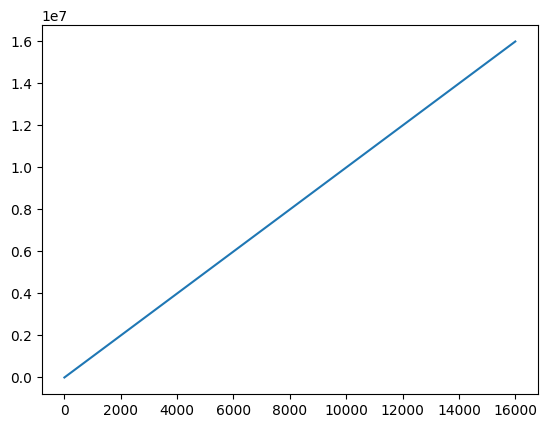

In [281]:
plt.plot(x, y);

In [282]:
# df = df[['price', 'area']]

In [283]:
"""plt.scatter(df['area'], df['price'])
plt.plot(x, y, c='red')"""

"plt.scatter(df['area'], df['price'])\nplt.plot(x, y, c='red')"

In [284]:
x = df['area']
y = df['price']

In [285]:
x = np.array(x)

In [286]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [287]:
def cost_function(w, b, y_pred, y_true):
  loss = 0
  n = len(y_pred)
  assert(n == len(y_true))

  for i in range(n):
    loss += (y_pred[i] - y_true[i]) ** 2

  loss = loss / 2 * n

  return loss

In [288]:
def fit(x, y, epochs=100, lr=0.1):
  w = 1
  b = 0
  m = len(x)

  assert(m == len(y))


  for epoch in range(epochs):
    dw = 0
    db = 0

    for i in range(m):
      dw += (w * x[i] + b - y[i]) * x[i]
      db += (w * x[i] + b - y[i])

    w = w - (1 / m) * lr * dw
    b = b - (1 / m) * lr * db

    y_pred = [w * x_i + b for x_i in x]

    print(f'On epoch: {epoch} loss is: {cost_function(w, b, y_pred, y)}\n{"-" * 60}')

  return w, b

In [289]:
# w, b = fit(x, y, epochs=1000)

In [290]:
y_pred = [w * x_i + b for x_i in x]

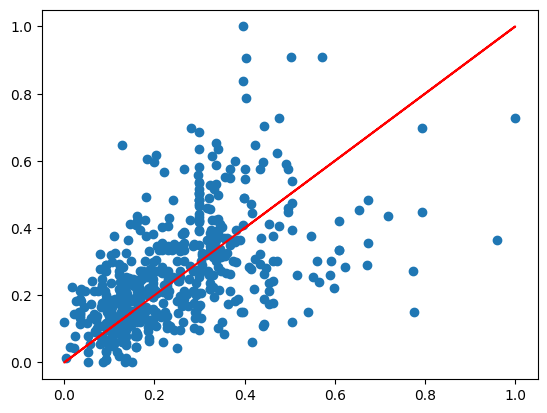

In [291]:
plt.scatter(x, y);
plt.plot(x, y_pred, c='red')

# **LOL SWEET**

<img src='https://www.memeatlas.com/images/wojaks/wojak-soy-boy-front.png' width=35%>

In [292]:
"""def predict(X):
  predictions = []

  for i in range(len(X)):
    predictions.append(w * X[i] + b)

  return predictions"""

'def predict(X):\n  predictions = []\n\n  for i in range(len(X)):\n    predictions.append(w * X[i] + b)\n\n  return predictions'

In [293]:
"""x_test = [0.86, 0.83, 0.24, 0, 0.34, 0.65, 0.7]
y_pred = predict(x_test)"""

'x_test = [0.86, 0.83, 0.24, 0, 0.34, 0.65, 0.7]\ny_pred = predict(x_test)'

In [294]:
# plt.plot(x_test, y_pred);

<img src='https://media.tenor.com/m-vr2mwFOTIAAAAi/xd.gif' width=5%>
IT WORKS
<img src='https://media.tenor.com/m-vr2mwFOTIAAAAi/xd.gif' width=5%>

<img src='https://i.redd.it/pvi8ctnhfzwc1.jpeg' width=40%>

UPDATE:

- implementation in class:

In [295]:
class LinearRegression:
  def __init__(self, w=1, b=0, lr=0.01):
    self.w = w
    self.b = b
    self.lr = lr

    # useful stuff
    self.loss_history = [float('inf')]
    self.patience_level = 0
    self.modifier_list = {'early_stopping_modifier': self.early_stopping_modifier}
    self.losses_list = {'mse': self.mean_squared_error}



  # 0.1   Boring Shit  (modifiers, loss functions, blah blah blah)

  # modifiers
  # --------------

  def early_stopping_modifier(self, n_iter, delta=0.01, loss_val=0):
    self.n_iter = n_iter
    self.delta = delta
    self.loss_val = loss_val

    if self.patience_level >= n_iter:
      return 1

    elif loss_val - min(self.loss_history) > delta:
        self.patience_level += 1

    else:
      self.patience_level = 0


  # loss functions
  # --------------
  def mean_squared_error(self, pred, true):
    loss = 0
    n = len(pred)
    assert(n == len(true))

    for i in range(n):
      loss += (pred[i] - true[i]) ** 2

    loss = loss / 2 * n

    return loss


  # fit method
  def fit(self, x, y, epochs=100, lr=0.1, loss_function='mse', modifier=None, patience=5, delta=1, verbose=2):
    n = len(x)

    assert(n == len(y))


    #   2.1.0  Gradient Descent Optimization
    for epoch in range(epochs):
      # partial derivatives of our linear regression
      # see details in the end of notebook👇
      dw = 0
      db = 0

      for i in range(n):
        dw += (self.w * x[i] + self.b - y[i]) * x[i]
        db += (self.w * x[i] + self.b - y[i])

      self.w = self.w - ((1 / n) * dw * self.lr)
      self.b = self.b - ((1 / n) * db * self.lr)

      # calculate loss:
      y_pred = [self.w * x[i] + self.b for i in range(len(x))]
      loss = self.losses_list[loss_function](y_pred, y)

      # stats for nerds🤓:
      if verbose >= 2:
        print(f'Epoch: {epoch} | Loss: {loss} \n {"-" * 60}')
      elif verbose == 1:
        print(f'Epoch: {epoch}')


      if modifier == 'early_stopping_modifier':
        if self.modifier_list[modifier](patience, delta=1, loss_val=loss) == 1:
          print('balls')
          return w, b


      self.loss_history.append(loss)

  # 2.3  prediction method
  def predict(self, X):
    prediction = []

    for val in X:
      prediction.append(self.w * val + self.b)
    return prediction



In [296]:
model = LinearRegression(lr=0.1)

model.fit(x, y, epochs=500, modifier='early_stopping_modifier', delta=0.001, patience=500, verbose=0)
pred = model.predict(x)

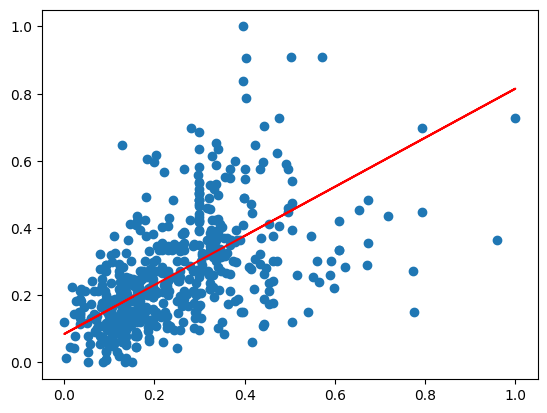

In [297]:
plt.scatter(x, y);
plt.plot(x, pred, c='red');

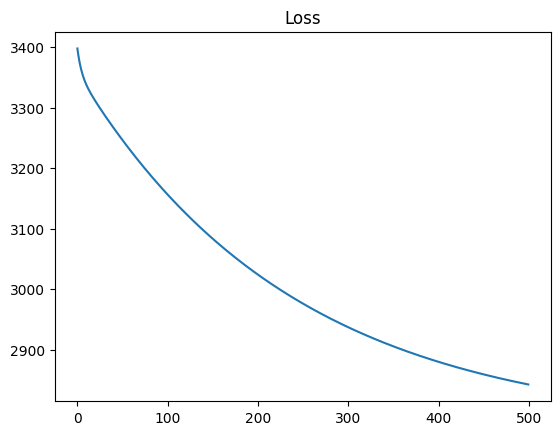

In [298]:
plt.title('Loss')
plt.plot(model.loss_history[1:]);

In [299]:
a = model.predict([1])
a

[0.8146778210251696]

Hour of my life passed... <br>

I feel like I created something worthwhile!<br>

See ya!!!<br>
___

<img src='https://media1.tenor.com/m/OVHh61F6BYgAAAAd/jjkoobies-love-you-boys.gif' width=25%>

# **Update from 28.04.2024**
___

Multiple Variable Linear Regression Implementation

In [300]:
x = np.array([[np.random.random() for j in range(2)] for i in range(100)])
x.shape

(100, 2)

In [301]:
y = np.array([sum(x[i]) for i in range(x.shape[0])])
y.shape

(100,)

In [302]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [303]:
class LinearRegression:
  def __init__(self, lr=0.01):
    self.w = []
    self.b = 0
    self.lr = lr

    # useful stuff
    self.loss_history = [float('inf')]
    self.patience_level = 0
    self.modifier_list = {'early_stopping_modifier': self.early_stopping_modifier}
    self.losses_list = {'mse': self.mean_squared_error}



  # 0.1   Boring Shit  (modifiers, loss functions, blah blah blah)

  # modifiers
  # --------------

  def early_stopping_modifier(self, n_iter, delta=0.01, loss_val=0):
    self.n_iter = n_iter
    self.delta = delta
    self.loss_val = loss_val

    if self.patience_level >= n_iter:
      return 1

    elif loss_val - min(self.loss_history) > delta:
        self.patience_level += 1

    else:
      self.patience_level = 0


  # loss functions
  # --------------
  def mean_squared_error(self, pred, true):
    loss = 0
    n = len(pred)
    assert(n == len(true))

    for i in range(n):
      loss += (pred[i] - true[i]) ** 2

    loss = loss / 2 * n

    return loss


  # fit method
  def fit(self, x, y, epochs=100, lr=0.1, loss_function='mse', modifier=None, patience=5, delta=1, verbose=2):

    self.w = np.zeros(x.shape[1])  # initialize weights

    samples, features = x.shape

    assert(samples == y.shape[0])


    #   2.1.0  Gradient Descent Optimization
    for epoch in range(epochs):
      # partial derivatives of our linear regression
      # see details in the end of notebook👇
      dw = np.zeros(features)
      db = 0

      for i in range(samples):
        dw += (np.dot(self.w, x[i]) + self.b - y[i]) * x[i]
        db += np.dot(self.w, x[i]) + self.b - y[i]

      self.w = self.w - ((1 / samples) * dw * self.lr)
      self.b = self.b - ((1 / samples) * db * self.lr)

      # calculate loss:
      y_pred = [self.w * x[i] + self.b for i in range(len(x))]
      loss = self.losses_list[loss_function](y_pred, y)

      # stats for nerds🤓:
      if verbose >= 2:
        print(f'Epoch: {epoch} | Loss: {loss} \n {"-" * 60}')
      elif verbose == 1:
        print(f'Epoch: {epoch}')


      if modifier == 'early_stopping_modifier':
        if self.modifier_list[modifier](patience, delta=1, loss_val=loss) == 1:
          print('balls')
          return w, b


      self.loss_history.append(loss)

  # 2.3  prediction method
  def predict(self, X):
    prediction = []
    for val in X:
      prediction.append(np.dot(self.w, val) + self.b)
    return prediction



In [304]:
model = LinearRegression(lr=0.001)

model.fit(x, y, epochs=5_000, verbose=0)
pred = model.predict(x)

In [311]:
preds = []
for i in range(100):
  pred = model.predict([x[i]])
  preds.append(pred)

  # print(f'Model pred: {pred}, Real value: {y[i]}, Error: {(pred - y[i]) ** 2}')

In [327]:
x_ = []
z_ = []

for i in x:
  x_.append(i[0])
  z_.append(i[1])


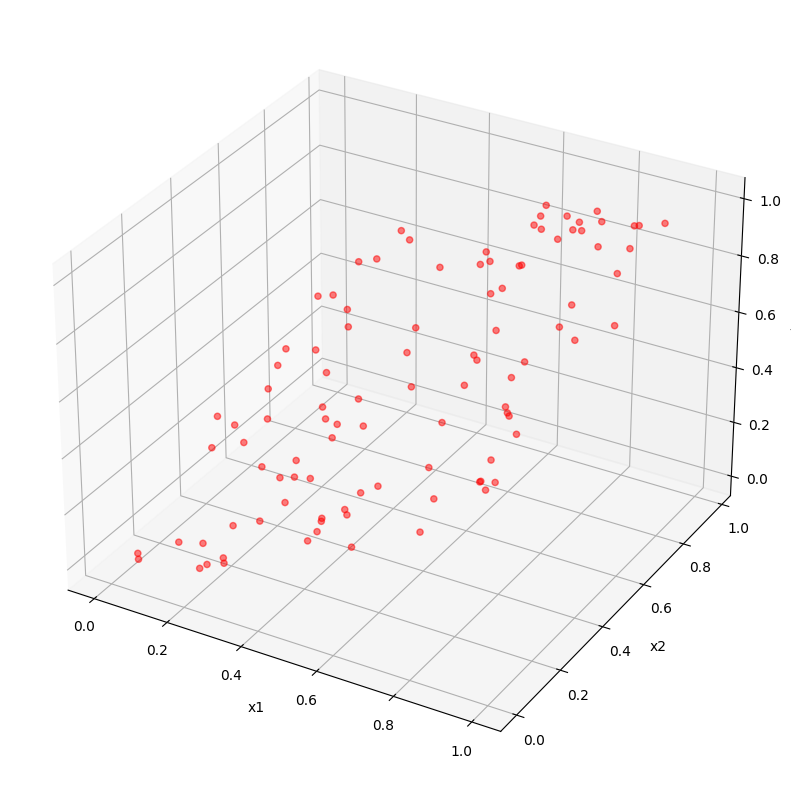

In [336]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_, z_, y, c='red', marker='o', alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()